<a href="https://colab.research.google.com/github/mikelalvarezbejarano/sis420/blob/main/mikelalvarezPR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Alvarez Bejarano Mikel
Carrera: Ing. Sistemas

In [2]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/Life Expectancy Data.csv', header=0)

In [5]:
print(data)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

muestra toda la informacion del dataset columnas 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

cambiamos los dtype a valores buenos

In [9]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [11]:
#Procesamiento de frases
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [12]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

vemos el cambio de dtype de algunas columnas como por ejemplo de objet = int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

imprime toda las columnas existente

In [14]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


relizamos el llenamos de algunas filas sin datos y rellenamos con datos media MEAN

In [15]:
#llenar datos vacios
vacios = ['Life expectancy ','Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
media_columnas = data[vacios].mean()
data[vacios] = data[vacios].fillna(media_columnas)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [17]:
columnas_seleccionadas = list(range(0, 3)) + list(range(4, 22))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 3]
m = y.size

In [18]:
print(X)
print('*'*15)
print(y)

      Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0           0  2015       1            263.0             62     0.01   
1           0  2014       1            271.0             64     0.01   
2           0  2013       1            268.0             66     0.01   
3           0  2012       1            272.0             69     0.01   
4           0  2011       1            275.0             71     0.01   
...       ...   ...     ...              ...            ...      ...   
2933      192  2004       1            723.0             27     4.36   
2934      192  2003       1            715.0             26     4.06   
2935      192  2002       1             73.0             25     4.43   
2936      192  2001       1            686.0             25     1.72   
2937      192  2000       1            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0                  71.279624         65.0      1154   19.1  .

In [19]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma


In [20]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0           0  2015       1            263.0             62     0.01   
1           0  2014       1            271.0             64     0.01   
2           0  2013       1            268.0             66     0.01   
3           0  2012       1            272.0             69     0.01   
4           0  2011       1            275.0             71     0.01   
...       ...   ...     ...              ...            ...      ...   
2933      192  2004       1            723.0             27     4.36   
2934      192  2003       1            715.0             26     4.06   
2935      192  2002       1             73.0             25     4.43   
2936      192  2001       1            686.0             25     1.72   
2937      192  2000       1            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0                  71.279624         65.0      1154   19.1  .

In [21]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [22]:
print(X)

[[ 1.         -1.69104231  1.6217623  ...  2.77327898 -0.72540055
  -0.57993072]
 [ 1.         -1.69104231  1.40498625 ...  2.81790246 -0.74005007
  -0.61056961]
 [ 1.         -1.69104231  1.1882102  ...  2.86252595 -0.7693491
  -0.6412085 ]
 ...
 [ 1.          1.7231814  -1.19632639 ... -0.79659991 -0.97932554
  -0.61056961]
 [ 1.          1.7231814  -1.41310244 ... -0.70735294 -0.97932554
  -0.6718474 ]
 [ 1.          1.7231814  -1.62987849 ...  1.41226265 -0.94514333
  -0.6718474 ]]


In [23]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [24]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 6.90548807e+01  2.03511673e-01 -5.76856004e-02 -5.72154403e-01
 -2.52761231e+00  1.18089260e-01  1.47213429e-01  2.24974508e-01
 -3.63402885e-01 -2.93372211e-01  9.08523716e-01 -3.64838246e-01
  7.68694370e-01  1.59669096e-01  1.06655206e+00 -2.45532972e+00
  3.42716235e-01  1.80287668e-01 -2.24760614e-01 -4.19790427e-02
  1.46909218e+00  2.03144682e+00]
El valor predecido es (usando el descenso por el gradiente): 60


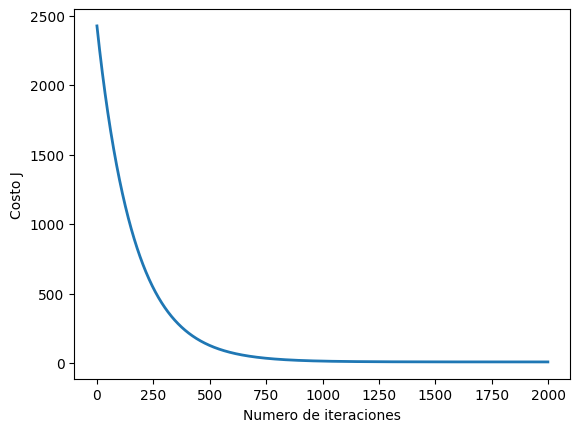

In [25]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 2000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 0, 2016, 1, 262.0, 63, 0.01, 71.279624, 65.0, 1153, 19.1, 84, 6.0, 8.15, 64.0, 0.1, 584.259211, 33736484.0, 17.3, 17.2, 0.478, 10.2]
X_array[1:22] = (X_array[1:22] - mu) / sigma
value = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.0f}'.format(value))

In [26]:
X_array = [1, 0, 2016, 1, 262.0, 63, 0.01, 71.279624, 65.0, 1153, 19.1, 84, 6.0, 8.15, 64.0, 0.1, 584.259211, 33736484.0, 17.3, 17.2, 0.478, 10.2]
X_array[1:22] = (X_array[1:22] - mu) / sigma

In [27]:
X_array[0:22]

[1,
 -1.6910423140158464,
 1.8385383538304807,
 0.4593985099361714,
 0.7835256472436827,
 0.277305076728185,
 -1.1729584018986519,
 -0.33557031153518757,
 -0.7058607757441233,
 -0.11047159203094943,
 -0.9647145027421464,
 0.2615928287221032,
 -3.2786378542507335,
 0.9216394141225958,
 -0.7752599927147125,
 -0.3234448000817086,
 -0.5252476569350006,
 0.3899749213297317,
 2.8358895894997342,
 2.750967232936907,
 -0.7302837206733858,
 -0.5492918315702502]

In [29]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/Life Expectancy Data.csv', header=0)
columnas_seleccionadas = list(range(0, 3)) + list(range(4, 22))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 3]
m = y.size

In [30]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 0, 2016, 1, 262.0, 63, 0.01, 71.279624, 65.0, 1153, 19.1, 84, 6.0, 8.15, 64.0, 0.1, 584.259211, 33736484.0, 17.3, 17.2, 0.478, 10.2]
value = np.dot(X_array, theta) 

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): {:.0f}'.format(value))